In [2]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

In [3]:
num_datasets = 100
num_train = 25
num_test = 25
sigma = 0.2

In [4]:
np.random.seed(1)
x_train = 2*np.pi*np.random.rand(num_train)
x_test  = 2*np.pi*np.random.rand(num_test)
y_train = np.sin(x_train) + np.random.normal(0,sigma, (num_datasets,num_train))
y_test  = np.sin(x_test)  + np.random.normal(0,sigma, (num_datasets,num_test))
y_pre   = np.zeros(y_test.shape)
f       = np.sin(x_test)

poly = PolynomialFeatures(degree=24)
xp_train = poly.fit_transform(x_train.reshape(-1,1))
xp_test  = poly.fit_transform(x_test.reshape(-1,1))

In [5]:
powers = np.logspace(-7,2)
bias_sq  = np.zeros(powers.size)
variance = np.zeros(powers.size) 
test_error = np.zeros(powers.size) 

mse_test  = np.zeros((num_datasets, powers.size))
mse_train = np.zeros((num_datasets, powers.size))

In [6]:
for i, p in enumerate(powers):
    lr = Ridge(alpha=p, normalize=True)
    for j in range(num_datasets):
        yt = y_train[j,:]
        lr = lr.fit(xp_train, yt)
        y_pre[j,:] = lr.predict(xp_test)
        
        mse_test[j,i]  = np.mean((y_test[j,:] - y_pre[j,:])**2)
        mse_train[j,i] = np.mean((y_train[j,:] - lr.predict(xp_train))**2)
       
    test_error[i] = np.mean(np.mean((y_test - y_pre)**2, axis=1))
    bias_sq[i]  = np.mean((np.mean(y_pre, axis=0) - f)**2)
    variance[i] = np.mean(np.var(y_pre, axis=0))

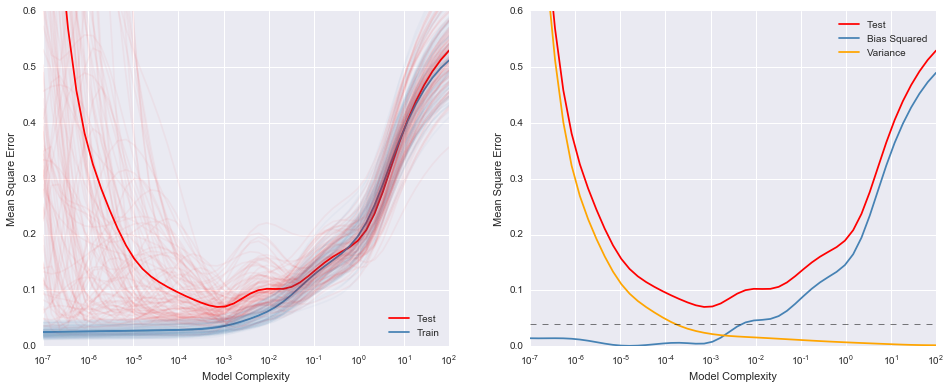

In [7]:
fig, axes = plt.subplots(1,2, figsize=(16,6))

ax = axes[0]
ax.semilogx(powers, test_error, color='red', label='Test')
ax.semilogx(powers, np.mean(mse_train, axis=0), color='steelblue', label='Train')
for i in range(num_datasets):
    ax.semilogx(powers, mse_test[i,:],  color='red', alpha=0.04)
    ax.semilogx(powers, mse_train[i,:], color='steelblue', alpha=0.04)
ax.legend(loc='lower right')

ax = axes[1]
ax.semilogx(powers, test_error, color='red', label='Test')
ax.semilogx(powers, bias_sq, color='steelblue', label='Bias Squared')
ax.semilogx(powers, variance, color='orange', label='Variance')
ax.axhline(sigma**2, ls='--', color='black', lw=0.5)
ax.legend(loc='upper right')

for ax in axes:
    ax.set_ylim(0,0.6)
    ax.set_xlabel("Model Complexity")
    ax.set_ylabel("Mean Square Error")